# Análisis Dataset Burn Rate

**1) Análisis Univariado**

In [ ]:
# Importamos las librerias a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
from pandas.api.types import is_numeric_dtype
import numpy as np
from matplotlib.patches import Rectangle
import seaborn as sns
import warnings
import plotly.express as px
import plotly.io as pio
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')
pio.templates.default = 'plotly_dark'



**Descripción**

El burnout laboral, también denominado síndrome del quemado o síndrome de estar quemado en el trabajo, es un estado de agotamiento físico, emocional y mental que está vinculado con el ámbito laboral, el estrés causado por el trabajo y el estilo de vida del empleado. Puede tener consecuencias muy graves, tanto en la esfera física como psicológica.
Objetivos de la investigación

Identificar el nivel de burnout a partir del indicador burn rate, que va a partir del 0 al 1, entre valores más altos, más burnout presenta el empleado.

Además, se construirá un modelo predictivo teniendo en cuenta que los empleados felices y saludables son indiscutiblemente más productivos en el trabajo y, a su vez, ayudan a que el negocio progrese.


**Descripción del problema**

Atender el problema de burnout en los empleados de cualquier empresa, para mejorar su salud mental, la cual repercute en su desempeño. 


**Indicación de la fuente del dataset**

El dataset proviene de la página de Kaggle el cual se compone de 22,750 registros agrupados en 9 variables:


**Significado de cada variable**

**Employee ID**: El ID único asignado a cada empleado (ejemplo: fffe390032003000 )

**Date of Joining:** La fecha y hora en que el empleado se unió a la organización (ejemplo: 2008-12-30 )

**Gender:** El género del empleado ( Hombre/Mujer )

**Company Type**: El tipo de empresa donde trabaja el empleado ( Servicio/Producto )

**WFH Setup Available:** ¿Está disponible el trabajo desde casa para el empleado? ( Sí/No )

**Designation:** La designación del empleado de trabajo en la organización.
En el rango de [0.0, 5.0] mayor es la designación mayor.

**Resource Allocation:** La cantidad de recursos asignados al empleado para trabajar, es decir. número de horas de trabajo.
En el rango de [1.0, 10.0] (más alto significa más recursos)

**Mental Fatigue Score:** El nivel de fatiga mental al que se enfrenta el empleado.
En el rango de [0.0, 10.0] donde 0.0 significa sin fatiga y 10.0 significa fatiga total.

**Burn Rate:** El valor que necesitamos predecir para cada empleado indicando la tasa de Burn out mientras trabaja.
En el rango de [0.0, 1.0] donde cuanto más alto es el valor, más se cansa.

In [ ]:
# Obtenemos los datos
df = pd.read_csv('train.csv')

In [ ]:
# Visualizamos los primeros 5 registros por si precisamos alguna transformacion de columnas o buscar sus separadores.
df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


In [ ]:
# Vemos la dimension del dataset
df.shape

print(f'El dataset cuenta con {df.shape[0]} registros y {df.shape[1]} columnas')

El dataset cuenta con 22750 registros y 9 columnas


En principio tenemos 9 columnas, de las cuales 5 son de tipo Object y 4 Float, aunque Date of Joining podemos transformarla en fecha.

In [ ]:
def univariado_info(df):
  '''Calculo de informacion estadistias y genericas de cada columna de un dataframe'''

  #crear un dataframe con específicas columnas

  df_info = pd.DataFrame(columns=['Cantidad', 'Tipo' , 'Missing', 'Unicos', 'Numeric'])

  #loop de todas las variables del dataframe
  for col in df:

      #obtengo info de la columna
      data_series = df[col]
      #lleno dataframe con las columnas iniciales
      df_info.loc[col] = [data_series.count(), data_series.dtype, data_series.isnull().sum(), data_series.nunique(), is_numeric_dtype(data_series)]

  #calculo el describe 
  df_describe = df.describe(include='all').T[['top','freq','mean', 'std', 'min', '25%', '50%', '75%', 'max']]
  #calculo sesgo y curtosis
  df_stats = pd.DataFrame([df.skew(), df.kurtosis()], index=['sesgo', 'kurt']).T

  return pd.concat([df_info,pd.concat([df_describe, df_stats], axis=1)], axis=1).fillna('-')


df_uni_stats = univariado_info(df)
df_uni_stats


,Cantidad,Tipo,Missing,Unicos,Numeric,top,freq,mean,std,min,25%,50%,75%,max,sesgo,kurt
Employee ID,22750,object,0,22750,False,fffe32003000360033003200,1,-,-,-,-,-,-,-,-,-
Date of Joining,22750,object,0,366,False,2008-01-06,86,-,-,-,-,-,-,-,-,-
Gender,22750,object,0,2,False,Female,11908,-,-,-,-,-,-,-,-,-
Company Type,22750,object,0,2,False,Service,14833,-,-,-,-,-,-,-,-,-
WFH Setup Available,22750,object,0,2,False,Yes,12290,-,-,-,-,-,-,-,-,-
Designation,22750,float64,0,6,True,-,-,2.178725,1.135145,0.0,1.0,2.0,3.0,5.0,0.092421,-0.414916
Resource Allocation,21369,float64,1381,10,True,-,-,4.481398,2.047211,1.0,3.0,4.0,6.0,10.0,0.204573,-0.479884
Mental Fatigue Score,20633,float64,2117,101,True,-,-,5.728188,1.920839,0.0,4.6,5.9,7.1,10.0,-0.430895,0.174277
Burn Rate,21626,float64,1124,101,True,-,-,0.452005,0.198226,0.0,0.31,0.45,0.59,1.0,0.045737,-0.261579


# **Conclusiones:**

 * *Employee ID:* no tenemos id repetidos son todos unicos de tipo Object

 * *Date of Joining*: es de tipo object pero son fechas, de las cuales tenemos una variacion de 366 fechas en las cuales la mayor frecuencia se visualiza para el 01-06-2008.

 * *Gender:* Viendo los valores de frecuencia y top podemos suponer que las dos categorias de genero estan bastante parecidas en porcentaje, no hay un balanceo significativo para una u otro genero.

 * *Company Type:* Son dos tipos de compania viendo su valor de frecuencia para la categoria top de Service podemos deducir que tiene la un 65 % de los datos.

 * *WFH Setup Available:* La mayor frecuencia de los registros nos indica que el 55% a simple vista tiene la disponibilidad de realizar home office. 

 * *Resource Allocation:*  Tiene 1381 registros nulos.

 * *Mental Fatigue Score:* Tiene 2117 registros nulos.

 * *Burn Rate:* Tiene 1124 registros nulos.
 
 * *Designation, Resource Allocation, Mental Fatigue Score, Burn Rate:* tienen el promedio y la mediana con valores similares.

 * *Podemos observar que hay variables que son numericas , como tambien categoricas.*


In [ ]:
# Se eliminarán los registros sin el campo "Burn Rate", que es el que queremos estimar, al no contar con estos valores en principio no los tomamos.
data_clean = df.dropna(subset = ["Burn Rate"])

# Se reemplazaran los valores NaN de los campos "Resource Allocation" y "Mental Fatigue Score" con su mediana, calculada con sus valores no nulos.
data_clean = data_clean.fillna(data_clean.median())

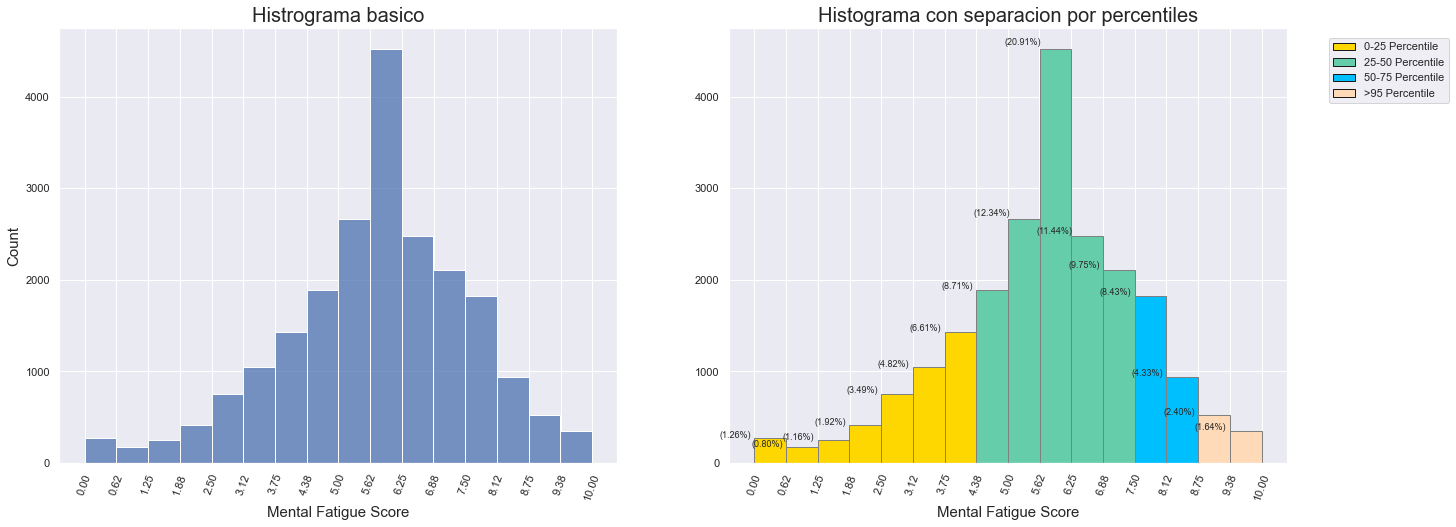

In [ ]:
fig , axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(22,8))

# grafico basico
sns.set_theme(rc={"font.size":9,"axes.titlesize":20,"axes.labelsize":15})
sns.histplot(data=data_clean, x='Mental Fatigue Score', ax=axes[0], bins='sturges').set(title='Histrograma basico' );
axes[0].tick_params(axis='x', rotation=70)


# Extraccion de la variable
data_fatiga = data_clean['Mental Fatigue Score']

# Cambio de colores por percentil
perc_25_colour = 'gold'
perc_50_colour = 'mediumaquamarine'
perc_75_colour = 'deepskyblue'
perc_95_colour = 'peachpuff'

#generacion de grafico en base a sturges
counts, bins, patches = axes[1].hist(data_fatiga, facecolor=perc_50_colour, edgecolor='gray', bins='sturges')

#seteo de la variable x en su anotacion
axes[1].set_xticks(bins.round(2))
plt.xticks(rotation=70)

# Genereo titulo y nombre de eje
plt.title('Histograma con separacion por percentiles', fontsize=20)
plt.xlabel('Mental Fatigue Score', fontsize=15)

#calculo de percentiles
q25, q75, q95 = np.percentile(data_fatiga, [25, 75, 95])

#asignacion de colores segun barra y los valores de los percentiles
for patch, leftside, rightside in zip(patches, bins[:-1], bins[1:]):
    if rightside <= q25:
        patch.set_facecolor(perc_25_colour)
    elif leftside > q95:
        patch.set_facecolor(perc_95_colour)
    elif leftside >= q75:
        patch.set_facecolor(perc_75_colour)

# ubicaion central de los eje de la barras x
bin_x_centers = 0.5 * np.diff(bins) + bins[:-1]

# display de las anotaciones de cada barra en porcentaje
for i in range(len(bins)-1):
    bin_label = "({0:,.2f}%)".format((counts[i]/counts.sum())*100)
    plt.text(bin_x_centers[i]- 1, counts[i]*1.01, bin_label, rotation_mode='anchor')

#create legend
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [perc_25_colour, perc_50_colour, perc_75_colour, perc_95_colour]]
labels= ["0-25 Percentile","25-50 Percentile", "50-75 Percentile", ">95 Percentile"]
plt.legend(handles, labels, bbox_to_anchor=(0.5, 0., 0.80, 0.99))

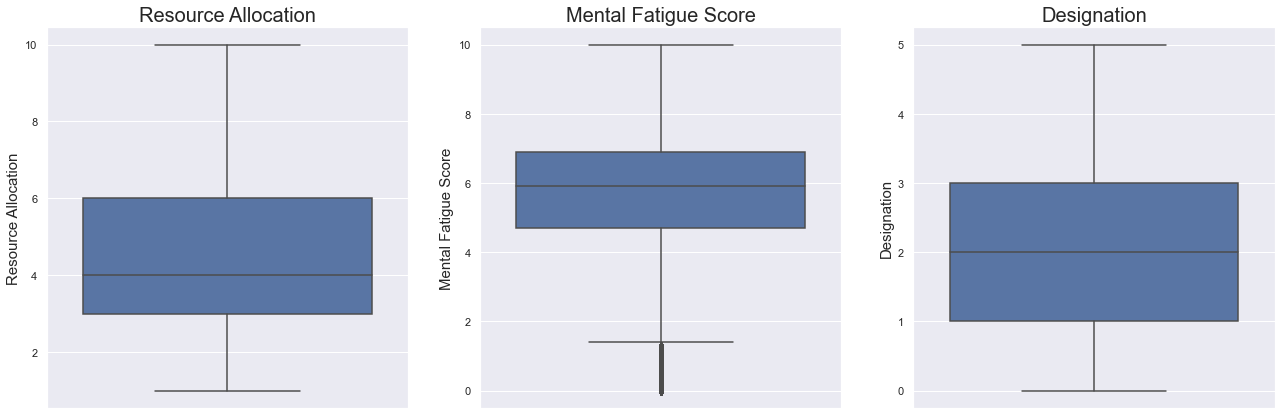

In [ ]:
# Se realiza un gráfico de cajas y bigotes para visualizar, de forma agregada, el tiempo de trabajo
fig, ax = plt.subplots(nrows=1,ncols=3,sharex=False, sharey=False,figsize=(22,7))

sns.boxplot(ax=ax[0],y='Resource Allocation',data=data_clean)
ax[0].set_title('Resource Allocation')

sns.boxplot(ax=ax[1],y='Mental Fatigue Score',data=data_clean)
ax[1].set_title('Mental Fatigue Score')

sns.boxplot(ax=ax[2],y='Designation',data=data_clean)
ax[2].set_title('Designation')

fig.show()

# **Conlusiones:**

* *Resource Allocation*: La mayoria de los datos se encuentran entre 3,5 y 6 horas de trabajo.

* *Mental Fatigue Score*: La mayoria de los datos se encuentran comprimidos en una fatiga entre 4,3 y 7.

* *Designation*: La mayoria de los datos se encuentran en la designacion entre 1 y 3.

<AxesSubplot:xlabel='Gender', ylabel='Burn Rate'>

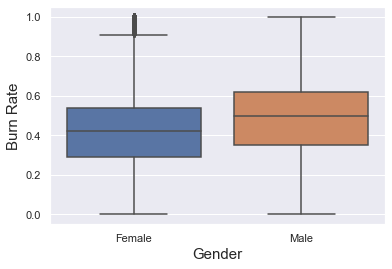

In [ ]:
sns.boxplot(y='Burn Rate',x='Gender',data=data_clean)

# **Conclusiones**:

* *A modo de observación, el gráfico muestra que, en general, los hombres tienden a tener un mayor nivel de burn out en términos agregados*

**2) Análisis Bivariado**

Debemos verificar y estudiar la relacion entre varialbes , en este caso dos variables. 
Una variable dependiente y otra independiente

In [ ]:
df = data_clean

## Correlación

In [ ]:
#corr pearson por default
matrix_correlation = df.corr() 
matrix_correlation.head()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Designation,1.000000,0.851383,0.657882,0.737556
Resource Allocation,0.851383,1.000000,0.740061,0.829632
Mental Fatigue Score,0.657882,0.740061,1.000000,0.898926
Burn Rate,0.737556,0.829632,0.898926,1.000000


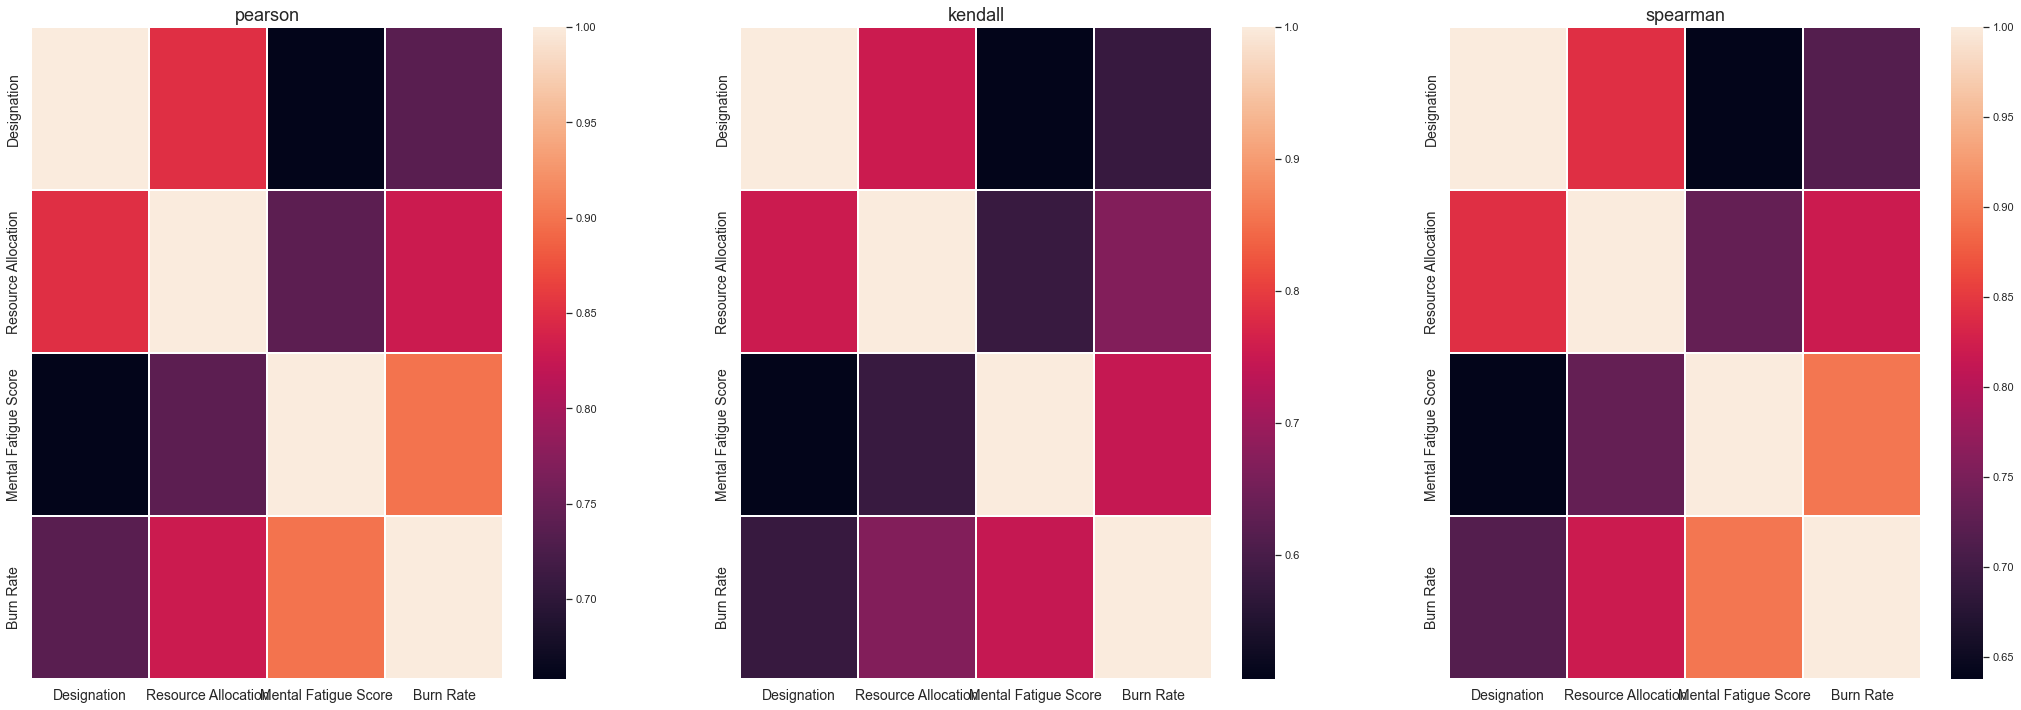

In [ ]:
#generacion de los graficos de correlacion entre los 3 metodos, 
plt.figure(figsize=(36,12))
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = df.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)
  plt.yticks(fontsize=14)
  plt.xticks(fontsize=14)

Text(0.5, 1.0, 'Correlaciones')

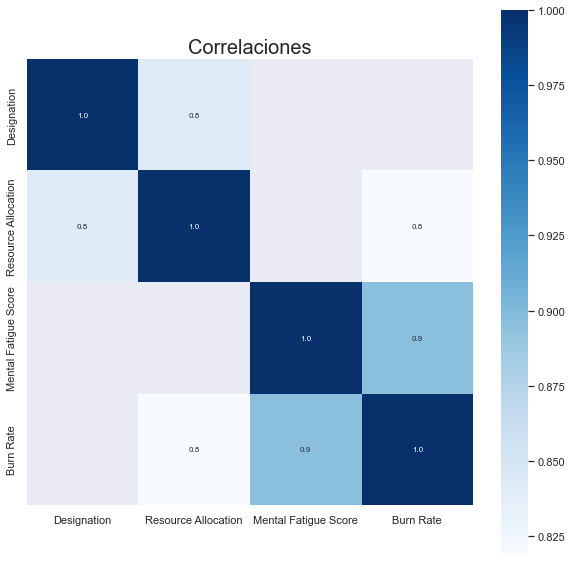

In [ ]:
#metodo para solo graficar en base a un threshold

mat_corr_spearman = df.corr('spearman')

#Se restringe para graficar valores con correlacion >= 0.8. Los que no tengan esta condición,
#tendrán un valor blanco en el gráfico

high_corr = mat_corr_spearman[mat_corr_spearman>=0.8] 
plt.figure(figsize=(10,10))
sns.heatmap(high_corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
plt.title('Correlaciones')


In [ ]:
#funcion para ordenar las correlaciones de las variables de mayor a menor
def corrFilter(x: pd.DataFrame, thres: float):
    #generate corr 
    xCorr = x.corr('spearman')
    #filter corr by thres
    xFiltered = xCorr[((xCorr >= thres) | (xCorr <= -thres)) & (xCorr !=1.000)]
    #change dataframe format
    xFlattened = xFiltered.unstack().drop_duplicates().reset_index().sort_values(0, ascending= False).dropna()
    #rename columns
    xFlattened.columns = ['Variable_1', 'Variable_2', 'corr_value']
    return xFlattened

corrFilter(df, .7)

x = df.corr('spearman')
y = x[((x >= 0.7) | (x <= -0.7)) & (x !=1.000)]

y.unstack().drop_duplicates().reset_index().sort_values(0, ascending= False).dropna()


,level_0,level_1,0
5,Mental Fatigue Score,Burn Rate,0.895622
1,Designation,Resource Allocation,0.841758
4,Resource Allocation,Burn Rate,0.819000
3,Resource Allocation,Mental Fatigue Score,0.731734
2,Designation,Burn Rate,0.718205


## Graficos en conjunto de puntos

Analisis de variables cuantitativas  

Text(0.5, 1.02, 'Grafico de puntos en variables numericas')

<Figure size 1008x1008 with 0 Axes>

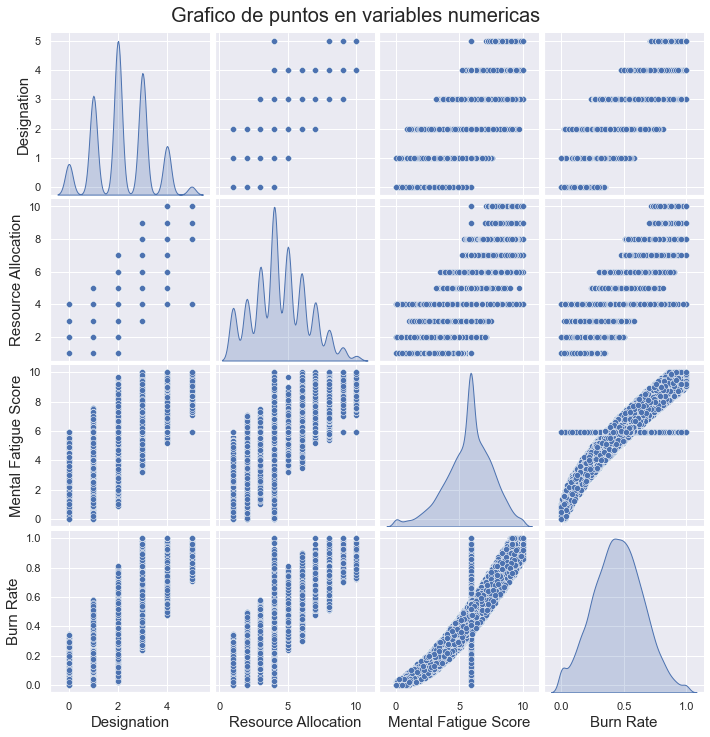

In [ ]:
plt.figure(figsize=(14, 14))

g = sns.pairplot(df[['Designation','Resource Allocation','Mental Fatigue Score','Burn Rate']], diag_kind='kde');
g.fig.suptitle("Grafico de puntos en variables numericas", fontsize=20, y=1.02)


Comentarios

Exsite correlacion entre Burn Rate,  versus Mental Fatigue Score y entre todas las variables a un nivel mas bajo.

En la diagonal se ve que todos los graficos de densidad muestran una distribucion Normal

**Gráfico boxplots**

In [ ]:
df['Designation'].value_counts()

2.0    7206
3.0    5698
1.0    4632
4.0    2275
0.0    1439
5.0     376
Name: Designation, dtype: int64

Text(0.5, 1.0, 'Rango del nivel de burn rate vs jerarquía del empleado dentro de la empresa')

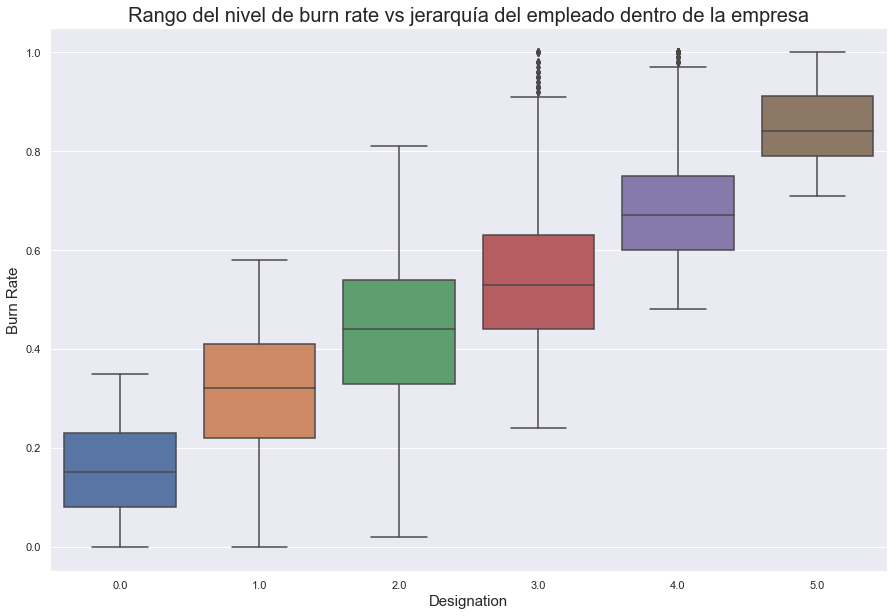

In [ ]:
fig , ax = plt.subplots(figsize=(15,10))
sns.boxplot(x='Designation', y='Burn Rate', data=df)
plt.title('Rango del nivel de burn rate vs jerarquía del empleado dentro de la empresa')

In [ ]:
df['Date of Joining'] = pd.to_datetime(df['Date of Joining'])#.dt.day
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21626 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           21626 non-null  object        
 1   Date of Joining       21626 non-null  datetime64[ns]
 2   Gender                21626 non-null  object        
 3   Company Type          21626 non-null  object        
 4   WFH Setup Available   21626 non-null  object        
 5   Designation           21626 non-null  float64       
 6   Resource Allocation   21626 non-null  float64       
 7   Mental Fatigue Score  21626 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 2.2+ MB


In [ ]:
df['Date of Joining'].dt.year.value_counts()

2008    21626
Name: Date of Joining, dtype: int64

In [ ]:
df['Date of Joining'].dt.month.value_counts()

10    1888
9     1877
3     1856
8     1854
7     1812
1     1812
5     1805
4     1766
12    1749
11    1748
2     1741
6     1718
Name: Date of Joining, dtype: int64

Categoricos vs numericos

In [ ]:
# categoricos vs numericos

df.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [ ]:
pd.crosstab(df['Gender'] , df['Designation'])

Designation,0.0,1.0,2.0,3.0,4.0,5.0
Gender,,,,,,
Female,881,2757,3801,2816,921,173
Male,558,1875,3405,2882,1354,203


Conclusiones: los cargos altos estan ocupados por hombres

In [ ]:
pd.crosstab(df['Gender'] , df['Resource Allocation'])

Resource Allocation,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
Gender,,,,,,,,,,
Female,1051,1194,1792,2773,1890,1251,739,405,185,69
Male,650,794,1236,2199,1780,1566,1141,587,243,81


Conclusiones: los hombres trabajan mas cantidad de horas que las mujeres.

<AxesSubplot:xlabel='Gender', ylabel='Burn Rate'>

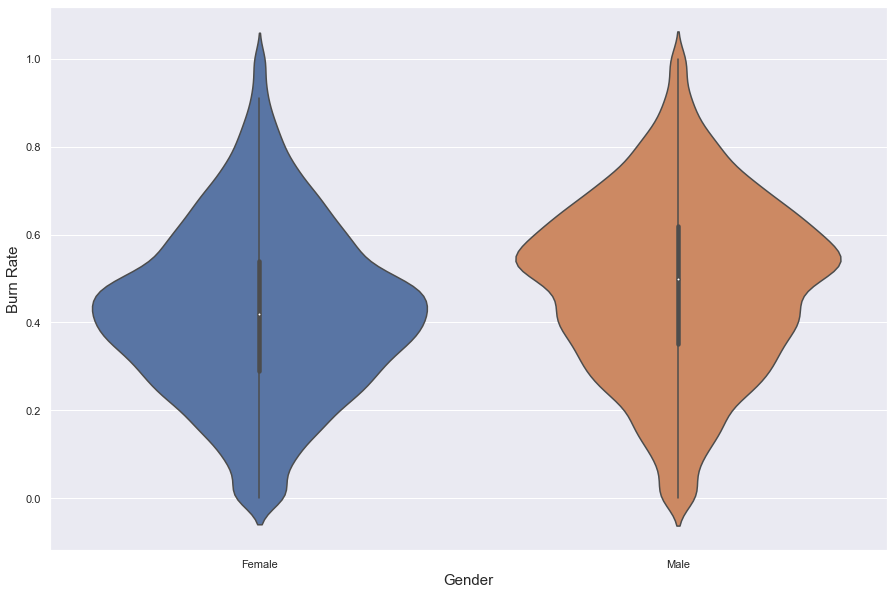

In [ ]:
plt.figure(figsize=(15,10))
sns.violinplot(x = 'Gender', y='Burn Rate', data=df)

Conclusiones: aqui vemos que los hombres tienen un nivel de stress mayor que las mujeres

## Categoricos vs Categoricos

In [ ]:
df.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

Para esto estilo de graficos se debe poder hacer primero un crosstab para poder luego hacer un grafico realcionado

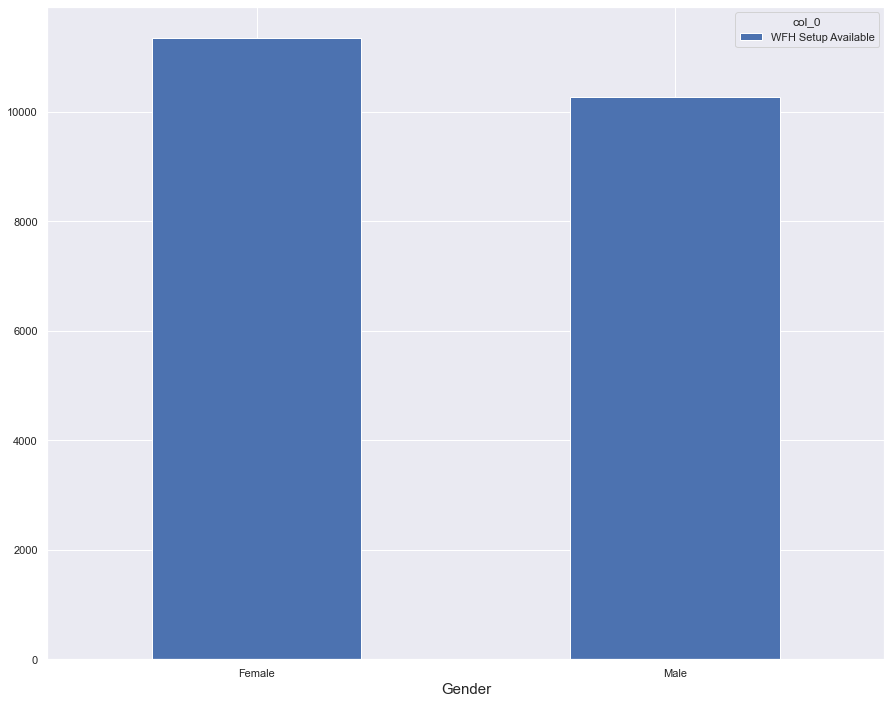

In [ ]:
#cat vs cat

cross = pd.crosstab(df['Gender'] , ['WFH Setup Available'])
cross.plot(kind="bar", stacked=True, rot=0, figsize=(15,12));
#cross
#falta diferenciar la leyenda

Conclusion: las mujeres hacen mas trabajo desde la casa

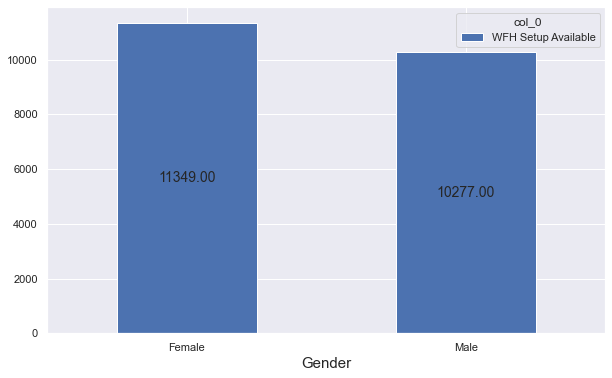

In [ ]:
ax = cross.plot(kind="bar", stacked=True, rot=0, figsize=(10,6))
for rect in ax.patches:
  # Find where everything is located
  height = rect.get_height()
  width = rect.get_width()
  x = rect.get_x()
  y = rect.get_y()
   # The height of the bar is the data value and can be used as the label
  label_text = f'{height:.2f}'
   # ax.text(x, y, text)
  label_x = x + width / 2
  label_y = y + height / 2
  # plot only when height is greater than specified value
  if height > 0:
      ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=14)
plt.show()

**3) Análisis Multivariado**

In [ ]:
df.rename(columns={
    'WFH Setup Available':'home_office'
},inplace=True)

In [ ]:
##CORREGIR PARA GENERAR GRÁFICO

# Generamos un box plot de Company Type, Gender y Burn Rate.

fig = px.box(data_frame=df, x='Gender',y='Burn Rate',color='home_office',orientation='v')
fig.show()

# Conclusiones:

### * Tanto los hombres como mujeres que no realizar home office tienen un mayor nivel de cansancio.

### * En comparacion entre los hombres y mujeres que realizan home office, vemos un mayor cansancio en los hombres.

### * Las mujeres que no realizan home office, tienen una mayor dispersion en contra posicion que los hombres.

In [ ]:
##CORREGIR PARA GENERAR GRÁFICO

fig = px.box(data_frame=df, x='Designation',y='Burn Rate',color='home_office',orientation='v')
fig.show()

# Conclusiones:

### * Podemos ver que los rangos medios (2 y 3), tienen una notoria diferencia de cansancio entre los que realizan home office y los que no.

### * Los rangos mas altos (4 y 5) tienen minimas diferencias del nivel de cansancio.

### * Los rangos mas bajos (0 y 1 ) tienen minimas diferencias del nivel de cansancio.

### Podriamos generar 3 rangos en los niveles de "Rango".

##### Rangos:   Rango: 1 -> [0 y 1], Rango: 2 -> [2 y 3], y Rango: 3 -> [4 y 5] .

In [ ]:
def new_range(x):
    if x < 2:
        return 0
    elif x < 4:
        return 1
    else:
        return 2

In [ ]:
df['new_range_designation'] = df['Designation'].apply(lambda x : new_range(x))

px.scatter(
      # data_frame=df.loc[df['Designation'].isin([3]),:],
      data_frame=df,
      x='Mental Fatigue Score', 
      y='Burn Rate',
      color='Gender',
      facet_col='Resource Allocation',
      facet_col_wrap= 10,
      facet_row='new_range_designation',
      template='plotly_dark',
      labels={
        'Resource Allocation':'Res All',
        'Mental Fatigue Score':'Men Fat Sco',
        'new_range_designation':'Des N Ra',
      },
      height=600,
      width=1300,
  )


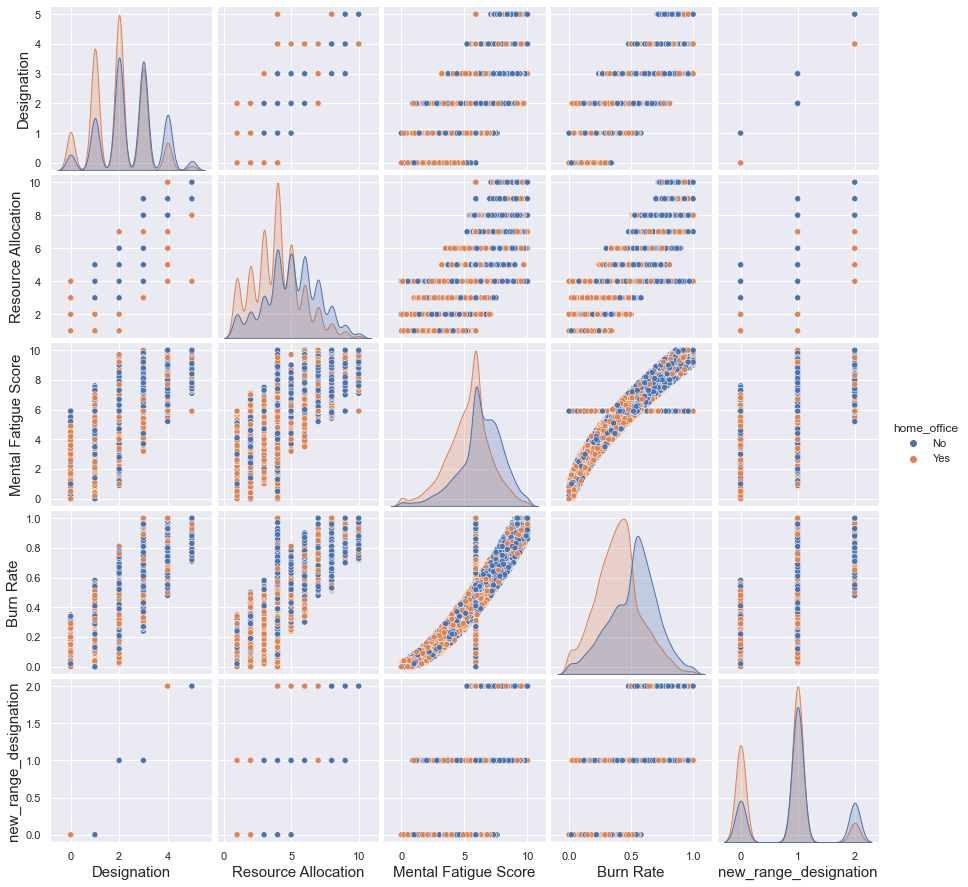

In [ ]:
sns.pairplot(df,hue='home_office')

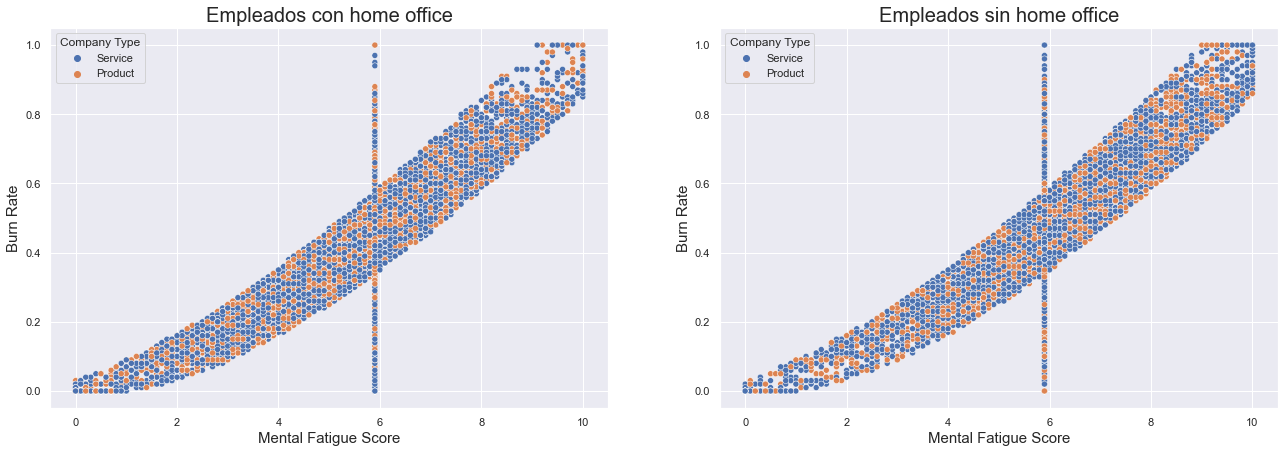

In [ ]:
yes_home_office = df.loc[df['home_office']=='Yes',:]
no_home_office = df.loc[df['home_office']!='Yes',:]

fig,ax = plt.subplots(nrows=1,ncols=2,sharex=False,figsize=(22,7))

sns.scatterplot(ax=ax[0],x = 'Mental Fatigue Score', y= 'Burn Rate', data=yes_home_office,hue='Company Type')
ax[0].set_title('Empleados con home office')

sns.scatterplot(ax=ax[1],x = 'Mental Fatigue Score', y= 'Burn Rate', data=no_home_office,hue='Company Type')
ax[1].set_title('Empleados sin home office')

fig.show()

# Conclusiones

### * Se ven datos bastante balanceados entre el nivel de fatiga, el nivel de cansancio para las dos tipos de compania segun realicen o no home office.

In [ ]:
fatiga_mental = df['Mental Fatigue Score'].value_counts().reset_index()

fatiga_mental.rename(columns={
    'index': 'fatiga_mental',
    'Mental Fatigue Score':'cantidad'
},inplace=True)

In [ ]:
def calculo(x):
  porcentaje = (x/fatiga_mental.cantidad.sum())*100
  return porcentaje

def fnAcumulado(x,column):
  acum = []
  acumulado = 0
  
  for i in x[f'{column}']:
    acumulado = i + acumulado
    acum.append(acumulado)
  
  x['acumulado'] = acum
  return x

In [ ]:
fatiga_mental['porcentaje'] = fatiga_mental['cantidad'].apply(lambda x: calculo(x=x) )
fatiga_mental = fnAcumulado(fatiga_mental,'porcentaje')

fatiga_mental[0:9]

,fatiga_mental,cantidad,porcentaje,acumulado
0,5.9,2384,11.023768,11.023768
1,6.0,451,2.085453,13.109220
2,5.8,436,2.016092,15.125312
3,6.3,432,1.997595,17.122908
4,5.6,426,1.969851,19.092759
5,6.5,426,1.969851,21.062610
6,6.1,425,1.965227,23.027837
7,5.7,423,1.955979,24.983816
8,6.4,415,1.918986,26.902802


# Conclusiones

##### *Hay una marcada cantidad de registros en el nivel de fatiga 5.9, con respecto a los demas niveles, debido a que hemos cargado los nulos de nivel de fatiga con su mediana, debemos revisar el relleno de los nulos para esta columna, ya que no esta generando muchos outliers, es decir datos anomalos.*


# Analisis de componentes principales

##### *El análisis de componentes principales (Principal Component Analysis PCA) es un método de reducción de dimensionalidad que permite simplificar la complejidad de espacios con múltiples dimensiones a la vez que conserva su información.*

##### *Como este algoritmo trabaja con valores numericos, primero tomaremos nuestras variables categoricas para transformaras en numericas con el enfoque de One Hot Encoding.*

##### *A su vez como aun no hemos hallado la manera correcta de como suplantar los valores nulos de Mental Fatigue Score, tomaremos nuevamente el dataset y limpiaremos todos los valores nulos.*

In [ ]:
dff = pd.read_csv('train.csv')

# Transformamos columna correspondiente a fecha.
dff['Date of Joining'] = pd.to_datetime(dff['Date of Joining'])

dff.sample(5)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
18319,fffe31003800300031003500,2008-07-20,Female,Product,Yes,2.0,3.0,3.6,0.24
19231,fffe32003000390032003200,2008-07-07,Male,Service,Yes,0.0,1.0,1.1,0.08
20342,fffe3500340032003700,2008-01-05,Male,Product,Yes,2.0,5.0,6.3,NaN
7495,fffe3200320039003000,2008-09-09,Male,Service,No,3.0,7.0,5.9,0.51
19188,fffe33003300380038003000,2008-05-12,Male,Service,Yes,2.0,4.0,2.6,0.19


In [ ]:
columnas ={
    'WFH Setup Available':'home_office',
    'Resource Allocation': 'res_allo',
    'Gender':'sex',
    'Designation':'desig',
    'Company Type':'comp_type',
    'Date of Joining':'date_join',
    'Employee ID':'id_employee',
    'Burn Rate':'burn_rate',
    'Mental Fatigue Score':'men_fat_score'
}

dff.rename(columns=columnas,inplace=True)

In [ ]:
# Vemos las columnas que quedan correspondiente a "Categoricas", excluiremos 'Employee ID'.
dff.select_dtypes(include='object').columns

Index(['id_employee', 'sex', 'comp_type', 'home_office'], dtype='object')

In [ ]:
# Vemos las descripciones estadisticas.
dff.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
id_employee,22750,22750,fffe32003000360033003200,1,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_join,22750,366,2008-01-06 00:00:00,86,2008-01-01,2008-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,22750,2,Female,11908,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
comp_type,22750,2,Service,14833,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_office,22750,2,Yes,12290,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
desig,22750.0,NaN,NaN,NaN,NaT,NaT,2.178725,1.135145,0.0,1.0,2.0,3.0,5.0
res_allo,21369.0,NaN,NaN,NaN,NaT,NaT,4.481398,2.047211,1.0,3.0,4.0,6.0,10.0
men_fat_score,20633.0,NaN,NaN,NaN,NaT,NaT,5.728188,1.920839,0.0,4.6,5.9,7.1,10.0
burn_rate,21626.0,NaN,NaN,NaN,NaT,NaT,0.452005,0.198226,0.0,0.31,0.45,0.59,1.0


In [ ]:
# Se eliminan los nulos como comentamos anteriormente. 
dff.dropna(inplace=True)

In [ ]:
# Designation y Resource Allocation son variables categoricas aunque figura como flotantes, pero son variables numericas ordinales, para ello se les aplica una transformacion en
# sus valores par que luego cuando apliquemos el One Hot Encoding los nombres de sus columnas no se repitan.
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18590 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id_employee    18590 non-null  object        
 1   date_join      18590 non-null  datetime64[ns]
 2   sex            18590 non-null  object        
 3   comp_type      18590 non-null  object        
 4   home_office    18590 non-null  object        
 5   desig          18590 non-null  float64       
 6   res_allo       18590 non-null  float64       
 7   men_fat_score  18590 non-null  float64       
 8   burn_rate      18590 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 1.4+ MB


In [ ]:
# Transformamos las columnas de float a object.
dff['desig']= dff['desig'].astype('object')
dff['res_allo'] = dff['res_allo'].astype('object')

dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18590 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id_employee    18590 non-null  object        
 1   date_join      18590 non-null  datetime64[ns]
 2   sex            18590 non-null  object        
 3   comp_type      18590 non-null  object        
 4   home_office    18590 non-null  object        
 5   desig          18590 non-null  object        
 6   res_allo       18590 non-null  object        
 7   men_fat_score  18590 non-null  float64       
 8   burn_rate      18590 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 1.4+ MB


In [ ]:
# Realizamos la aplicacion del one hote encoding para las columnas transformadas.
df_one_hot= pd.get_dummies(dff[['sex','comp_type','home_office','desig','res_allo']])

In [ ]:
# Agregamos mental fatigue score a nuestro nuevo data frame para realizar el analisis de componentes principales
df_one_hot['men_fat_score']= dff['men_fat_score']

In [ ]:
df_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18590 entries, 0 to 22749
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex_Female         18590 non-null  uint8  
 1   sex_Male           18590 non-null  uint8  
 2   comp_type_Product  18590 non-null  uint8  
 3   comp_type_Service  18590 non-null  uint8  
 4   home_office_No     18590 non-null  uint8  
 5   home_office_Yes    18590 non-null  uint8  
 6   desig_0.0          18590 non-null  uint8  
 7   desig_1.0          18590 non-null  uint8  
 8   desig_2.0          18590 non-null  uint8  
 9   desig_3.0          18590 non-null  uint8  
 10  desig_4.0          18590 non-null  uint8  
 11  desig_5.0          18590 non-null  uint8  
 12  res_allo_1.0       18590 non-null  uint8  
 13  res_allo_2.0       18590 non-null  uint8  
 14  res_allo_3.0       18590 non-null  uint8  
 15  res_allo_4.0       18590 non-null  uint8  
 16  res_allo_5.0       185

In [ ]:
# Se aplica el modelo PCA y se entrena para los primeros 6 componentes.
pca = PCA(n_components=6)
pca.fit(df_one_hot)

PCA(n_components=6)

In [ ]:
# Generamos el data frame a modo de muestra de como se distribuyen los componentes principales segun las columnas de nuestro dataset.
pd.DataFrame(
    data    = pca.components_,
    columns = df_one_hot.columns,
    index   = ['PC1','PC2','PC3','PC4','PC5','PC6']
)

,sex_Female,sex_Male,comp_type_Product,comp_type_Service,home_office_No,home_office_Yes,desig_0.0,desig_1.0,desig_2.0,desig_3.0,...,res_allo_2.0,res_allo_3.0,res_allo_4.0,res_allo_5.0,res_allo_6.0,res_allo_7.0,res_allo_8.0,res_allo_9.0,res_allo_10.0,men_fat_score
PC1,0.042980,-0.042980,0.001232,-0.001232,-0.080766,0.080766,0.054711,0.077320,0.006132,-0.067332,...,0.048090,0.038743,0.009903,-0.023801,-0.045941,-0.044467,-0.031205,-0.016920,-0.006456,-0.975313
PC2,-0.637908,0.637908,0.078502,-0.078502,0.273813,-0.273813,0.027429,-0.019526,-0.041861,0.010458,...,0.001181,-0.035128,-0.062522,-0.009739,0.035559,0.030907,0.007421,-0.002084,-0.001653,-0.106252
PC3,0.212486,-0.212486,-0.362894,0.362894,0.557912,-0.557912,0.024996,-0.024929,-0.064574,0.042449,...,-0.005810,-0.043741,-0.061182,0.004973,0.039475,0.022479,0.010009,-0.001347,-0.000209,-0.083154
PC4,0.211580,-0.211580,0.601640,-0.601640,0.298594,-0.298594,0.019563,-0.018916,-0.040885,0.033511,...,-0.002476,-0.029259,-0.036690,0.009639,0.023670,0.008253,0.003953,0.000385,0.000167,-0.034495
PC5,-0.012946,0.012946,0.007353,-0.007353,0.096984,-0.096984,-0.064380,-0.221237,0.770351,-0.413758,...,-0.085206,0.061958,0.307535,0.105014,-0.137639,-0.113231,-0.035218,-0.008028,-0.001674,0.003855
PC6,-0.002501,0.002501,-0.008536,0.008536,-0.053469,0.053469,0.057749,-0.525895,0.134365,0.575512,...,-0.160022,-0.283464,0.005647,0.399765,0.188655,-0.032166,-0.082194,-0.045813,-0.013973,-0.087028


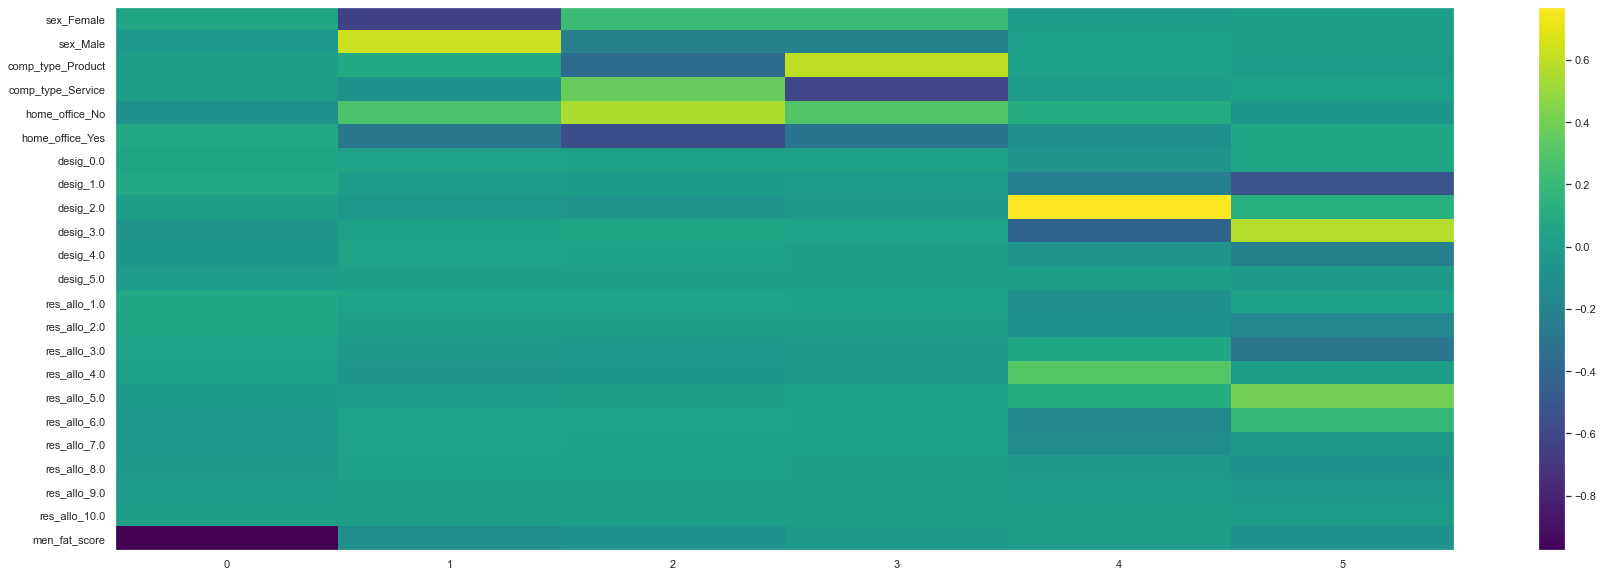

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30, 10))
componentes = pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(df_one_hot.columns)), df_one_hot.columns)
plt.grid(False)
plt.colorbar();

In [ ]:
import plotly.graph_objects as go

prop_varianza_acum = pca.explained_variance_ratio_.cumsum()

ratio = pd.DataFrame(
    data=pca.explained_variance_ratio_,
    index=[i for i in range(1,len(pca.explained_variance_ratio_)+1)],
    columns=['var']
).reset_index().rename(columns={'index':'Componentes'})

fig = px.bar(
    data_frame=ratio,
    x='Componentes',
    y='var',
    title='Porcentaje de varianza explicada por cada componente',
    text='var',
    color='Componentes'
)

fig.update_traces(
    textfont_size=20, 
    textangle=0, 
    textposition="outside", 
    cliponaxis=False
)

fig.update_xaxes(
    title='Componentes'
)

fig.add_trace(
    go.Scatter(
        x=[i for i in range(1,len(prop_varianza_acum)+1)],
        y=prop_varianza_acum,
        mode="lines",
        line=go.scatter.Line(color="white",dash='dot',width=5),
        showlegend=False
    )
)

fig.update_layout(
    title_x=0.5,
    title_font_size=30
)

fig.show()

#### *En este caso, el primer componente explica el 57% de la varianza observada en los datos. Los siguientes componentes no superan por separado el 1 % de varianza explicada*

In [ ]:
import plotly.graph_objects as go

prop_varianza_acum = pca.explained_variance_ratio_.cumsum()

var_acum = pd.DataFrame(
    data=prop_varianza_acum,
    index=[i for i in range(1,len(prop_varianza_acum)+1)],
    columns=['var_acum']
)

fig = px.bar(
    data_frame=var_acum,
    y='var_acum',
    title='Porcentaje de varianza acumulada',
    text=round(var_acum.var_acum * 100,0),
    color='var_acum'
)

fig.update_traces(
    textfont_size=20, 
    textangle=0, 
    textposition="outside", 
    cliponaxis=False
)

fig.update_xaxes(
    title='Componentes'
)

fig.update_layout(
    title_x=0.5,
    title_font_size=30
)

fig.add_trace(
    go.Scatter(
        x=[i for i in range(1,len(prop_varianza_acum)+1)],
        y=prop_varianza_acum,
        mode="lines",
        line=go.scatter.Line(color="white",dash='dot',width=5),
        showlegend=False)
)

fig.show()

print('''

La suma de los primeros 4 componentes superan el 77% de los datos, si utilizamos los {a} componentes obtendriamos mas de un 86% de los datos. 
Sin embargo en nuestro dataset tenemos {b} columnas de las cuales 1 es nuestro target, por ello podemos mencionar que aplicar este algoritmo 
en principio no seria conveniente ya que si 6 componentes explican el 87% de los datos y tenemos {c} columnas, continuaremos usando las mismas.

'''.format(a=len(pca.components_),b=len(dff.columns),c=len(dff.columns)-1))



La suma de los primeros 4 componentes superan el 77% de los datos, si utilizamos los 6 componentes obtendriamos mas de un 86% de los datos. 
Sin embargo en nuestro dataset tenemos 9 columnas de las cuales 1 es nuestro target, por ello podemos mencionar que aplicar este algoritmo 
en principio no seria conveniente ya que si 6 componentes explican el 87% de los datos y tenemos 8 columnas, continuaremos usando las mismas.




Se analizaron las relaciones entre las variables "Designation" y "Burn Rate" para identificar cómo afectaba el problema a las personas por su género y por el tipo de trabajo que realizan. Lo primero que se observa es que el Burn Rate aumenta conforme aumenta la designación que se tenga en el trabajo sin importar el género ni el tipo de compañía:

In [ ]:
sns.relplot(data=df, x='Designation', y='Burn Rate', kind='scatter', col='Gender', hue='Company Type')

Se observa que en las empresas de servicios las mujeres fueron predominantes, además, son las que más trabajo retomo realizan. 

In [ ]:
sns.displot(data=df, x='WFH Setup Available', col='Gender', row='Company Type')

In [ ]:
sns.displot(data=df, x='Burn Rate', col='Gender', row='Company Type')

Se observa también que el burn rate aumenta independientemente del sexo y la compañía conforme hay más horas trabajadas y estas se hacen presenciales

In [ ]:
sns.relplot(data=df, x='Resource Allocation', y='Burn Rate', kind='scatter', col='Gender', row='Company Type',hue='WFH Setup Available')

Aunado a lo anterior, el burn rate aumenta cuando hay más designaciones en el trabajo y este consiste en realizar el trabajo de forma presencial. Cabe resaltar que el burn rate en esta relación tampoco depende del género ni del tipo de compañía. 

In [ ]:
sns.relplot(data=df, x='Designation', y='Burn Rate', kind='scatter', col='Gender', row='Company Type',hue='WFH Setup Available')